In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, precision_score
from sklearn.model_selection import GridSearchCV 

In [3]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Analisis Exploratorio de Datos

In [4]:
diabetes.shape # Dimensiones del dataframe

(768, 9)

In [5]:
diabetes.info() # Información general de los datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.isnull().sum() # Cantidad de nulos por columnas

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes.describe() # Descripciones estadísticas del conjunto de datos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Hallazgos:
1. La cantidad promedio de embarazos en las mujeres del conjunto de datos es entre 3 y 4.
2. La edad promedio de las mujeres es de 33 años, mientras el 75% de las mujeres tiene de edad 41 años.
3. El valor promedio de glucosa en las pacientes es de 120, un valor alto comparado con el rngo promedio (60 - 110)

<Axes: >

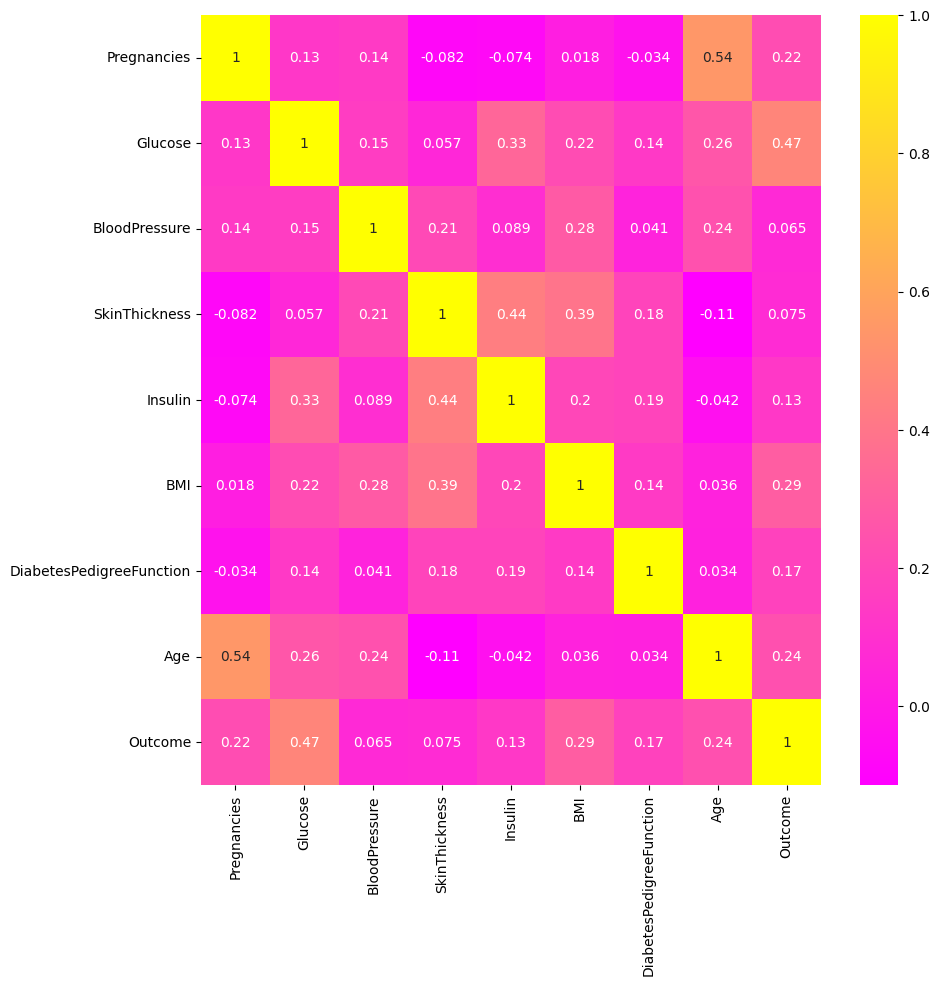

In [8]:
#Creación de la gráfica de correlaciones de cada una de las columnas de la tabla
plt.figure(figsize = (10,10))
sns.heatmap(diabetes.corr(),cmap="spring",annot = True)

Los factores que mas relacion tienen con la variable objetivo (Outcome), son: 
1. Glucosa
2. Edad

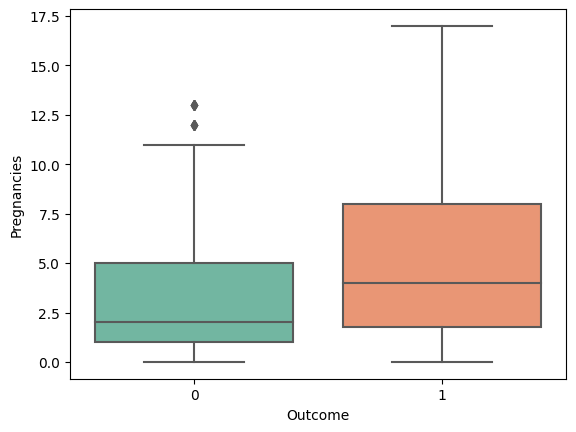

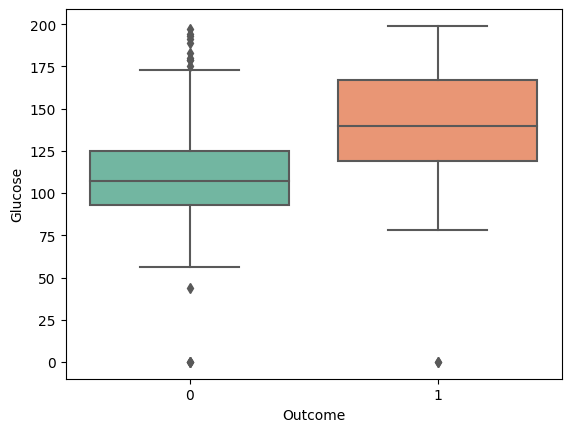

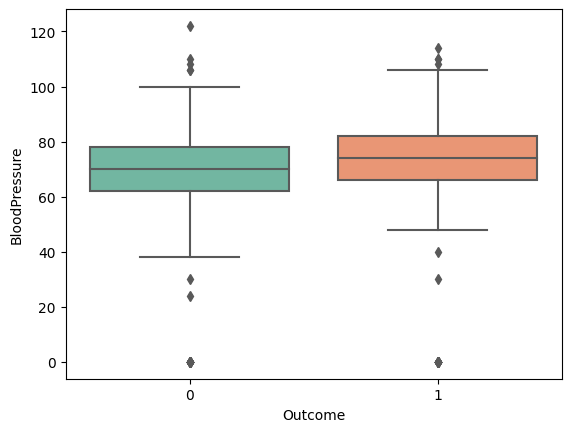

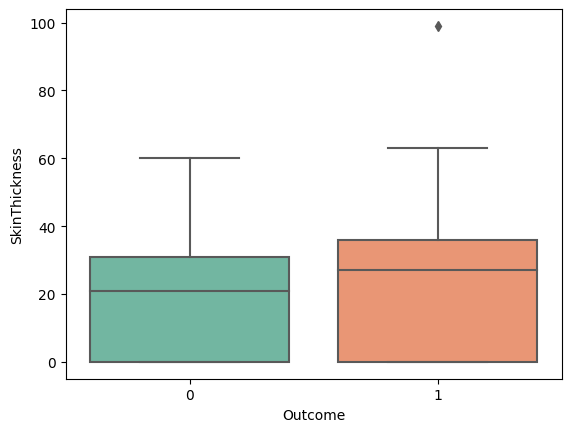

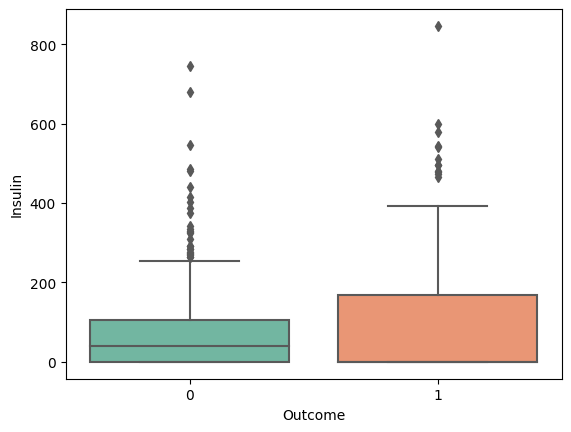

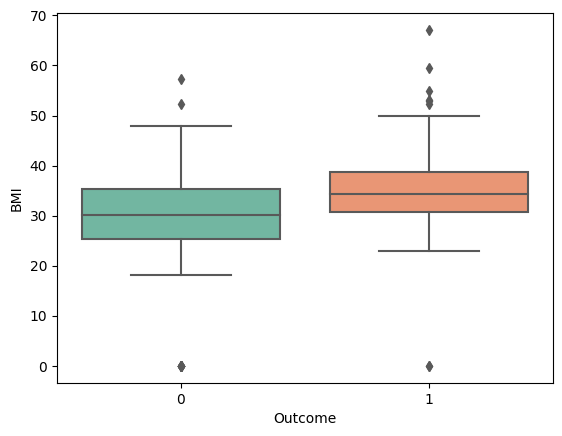

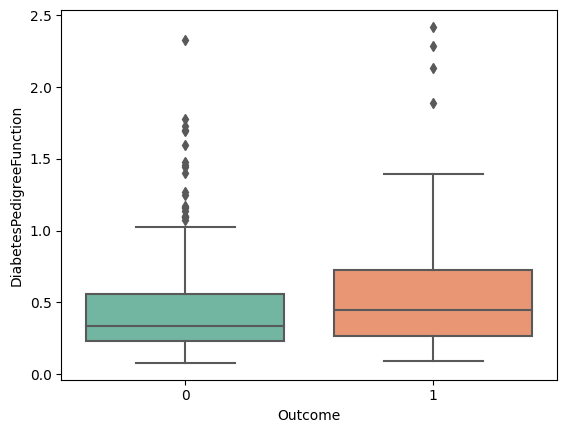

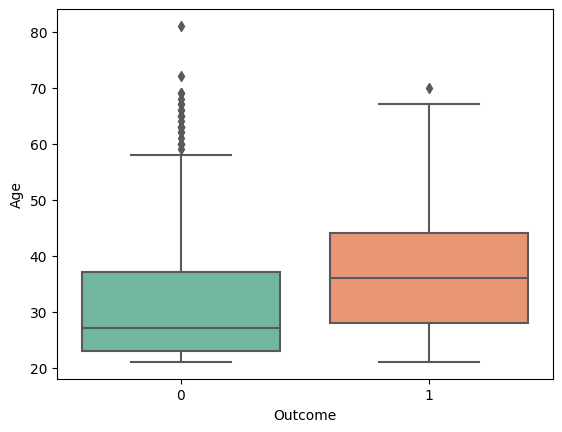

In [9]:
for i in diabetes.columns:
    if i!='Outcome':
        sns.boxplot(x = diabetes["Outcome"],y=diabetes[i],palette="Set2")
        plt.show()

Hallazgos:
1. El nivel de glucosa en las pacientes con diabetes oscila en valores mas altos que en las pacientes que no lo tienen.
2. Hay valores anómalos en caracteríticas: Glucosa, Presión de la Sangre, índice de Masa corporal.

<Axes: xlabel='Glucose', ylabel='Count'>

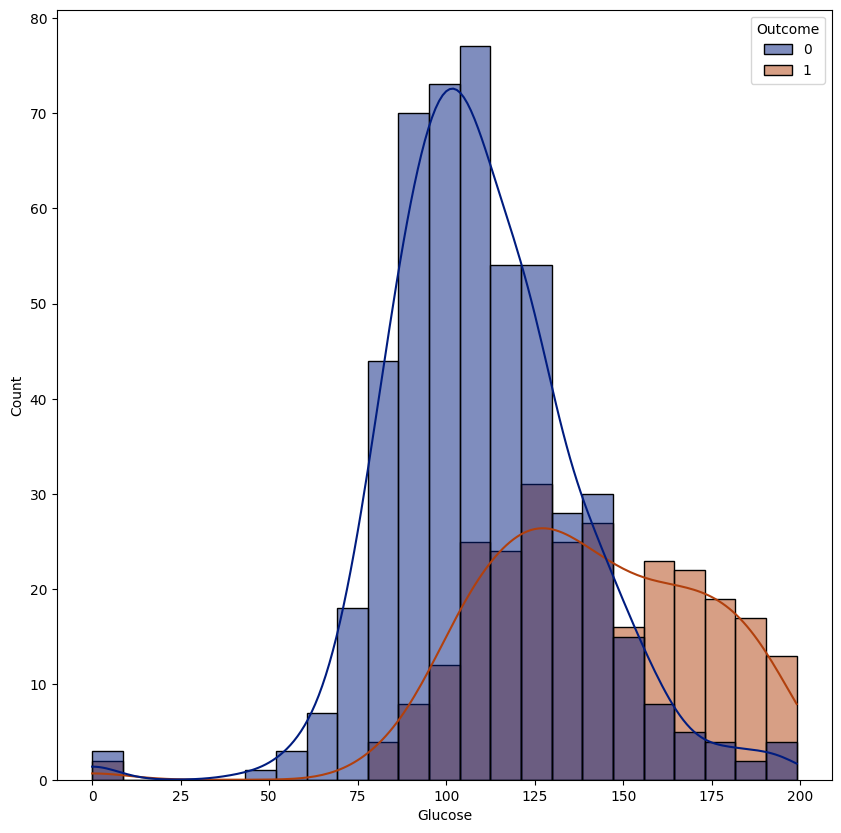

In [10]:
plt.figure(figsize = (10,10))
sns.histplot(x="Glucose", hue = "Outcome", data = diabetes, kde = True, palette = "dark")

Hallazgos: 
1. A partir de lecturas de 125 en glucosa (valores altos de glucosa), empieza a dominar la cantidad de valores positivos para la diabetes.
2. La mayor cantidad de pacientes positivos a diabetes es con niveles de 125 en glucosa.

<Axes: xlabel='BMI', ylabel='Count'>

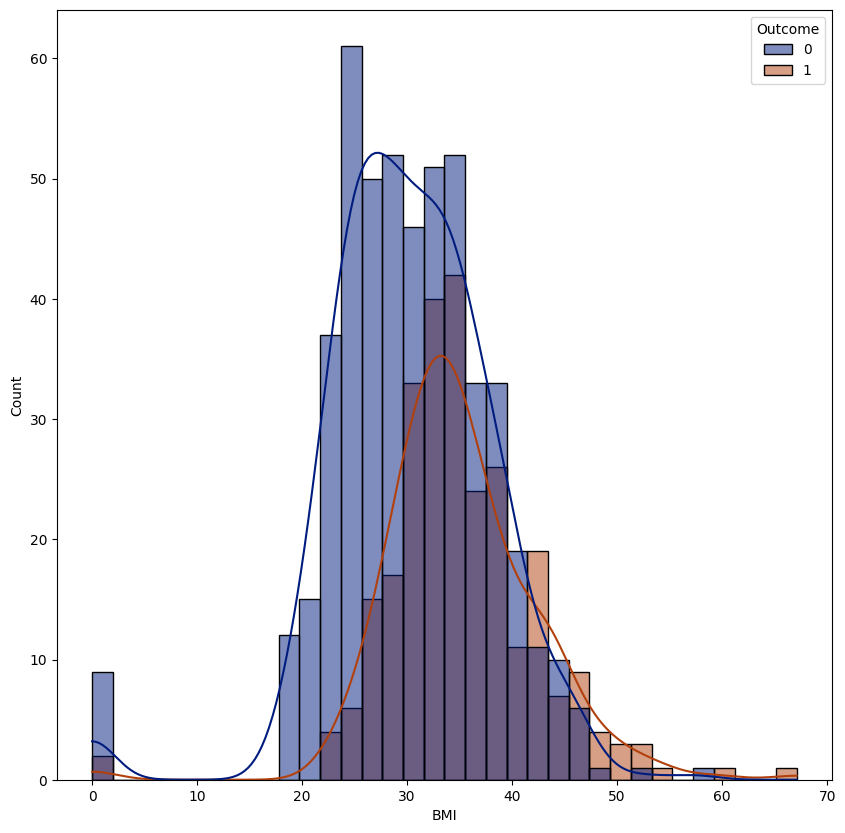

In [11]:
plt.figure(figsize = (10,10))
sns.histplot(x="BMI", hue = "Outcome", data = diabetes, kde = True, palette = "dark")

Hallazgos:
1. La mayor cantidad de pacientes tienen aproximadamente 35 años.
2. A partir de los 45 años empiezan a predominar los casos positivos de diabletes.

# Verificación de valores faltantes

In [12]:
diabetes["SkinThickness"].unique() # Revisión de valores unicos en "SkinThickness"

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

Las columnas BMI, SkinThickness, Glucose y BloodPressure tienen valores 0, por lo tanto hay que corregirlos

In [13]:
diabetes["BMI"].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [14]:
diabetes["BMI"] = diabetes["BMI"].replace([0], diabetes["BMI"].mean())

In [15]:
diabetes["BMI"].describe()

count    768.000000
mean      32.450805
std        6.875374
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [16]:
diabetes["SkinThickness"].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [17]:
diabetes["SkinThickness"] = diabetes["SkinThickness"].replace([0], diabetes["SkinThickness"].mean())

In [18]:
diabetes["SkinThickness"].describe()

count    768.000000
mean      26.606479
std        9.631241
min        7.000000
25%       20.536458
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [19]:
diabetes["Glucose"].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [20]:
diabetes["Glucose"] = diabetes["Glucose"].replace([0], diabetes["Glucose"].mean())

In [21]:
diabetes["Glucose"].describe()

count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [22]:
diabetes["BloodPressure"].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [23]:
diabetes["BloodPressure"] = diabetes["BloodPressure"].replace([0], diabetes["BloodPressure"].mean())

In [24]:
diabetes["BloodPressure"].describe()

count    768.000000
mean      72.254807
std       12.115932
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

# Distribución de clases

In [25]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Utilización del método resample para balancear las clases

In [26]:
not_diabetes = diabetes[diabetes["Outcome"] == 0]
diabetes_p = diabetes[diabetes["Outcome"] == 1] 

not_diabetes_under = resample(not_diabetes, replace=False, n_samples= len (diabetes_p), random_state= 123)
diabetes_under = pd.concat([not_diabetes_under, diabetes_p])

In [27]:
diabetes_under['Outcome'].value_counts()

Outcome
0    268
1    268
Name: count, dtype: int64

# Preprocesamiento de datos

In [28]:
diabetes_under.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
372,0,84.0,64.0,22.000000,66,35.8,0.545,21,0
525,3,87.0,60.0,18.000000,0,21.8,0.444,21,0
512,9,91.0,68.0,20.536458,0,24.2,0.200,58,0
633,1,128.0,82.0,17.000000,183,27.5,0.115,22,0
486,1,139.0,62.0,41.000000,480,40.7,0.536,21,0


In [29]:
valores_cc = diabetes_under.values 

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaler = scaler.fit(valores_cc) 

In [31]:
normalizados = scaler.transform(valores_cc)

In [32]:
cc_dataset_normalizado = pd.DataFrame(normalizados, index=diabetes_under.index, columns=diabetes_under.columns)
cc_dataset_normalizado

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
372,0.000000,0.258065,0.404762,0.163043,0.078014,0.359918,0.199402,0.000000,0.0
525,0.176471,0.277419,0.357143,0.119565,0.000000,0.073620,0.156277,0.000000,0.0
512,0.529412,0.303226,0.452381,0.147135,0.000000,0.122699,0.052092,0.616667,0.0
633,0.058824,0.541935,0.619048,0.108696,0.216312,0.190184,0.015798,0.016667,0.0
486,0.058824,0.612903,0.380952,0.369565,0.567376,0.460123,0.195559,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
755,0.058824,0.541935,0.690476,0.347826,0.130024,0.374233,0.418019,0.266667,1.0
757,0.000000,0.509677,0.500000,0.147135,0.000000,0.370143,0.076857,0.516667,1.0
759,0.352941,0.941935,0.738095,0.147135,0.000000,0.353783,0.085397,0.750000,1.0
761,0.529412,0.812903,0.523810,0.260870,0.000000,0.527607,0.138770,0.366667,1.0


# Entrenamiento del Modelo

In [33]:
X = diabetes_under.iloc[:, :-1]
y = diabetes_under.iloc[:, -1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [35]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [36]:
n_for = 5 # La validación cruzada de 5 veces se refiere a las iteraciones que ha de realizar. Por eso el valor de 5.
listaEvalsAD = list() # Se crea Lista para almacenar puntajes.
listaExactitudes = list() # Se crea Lista para almacenar valores de la métrica de exactitud.
listaPrecisiones = list() # Se crea Lista para almacenar métricas de exactitud.
listaRecuperaciones = list()  # Se crea Lista para almacenar métricas de recuperación.
listaF1s = list()  # Se crea Lista para almacenar métricas de F1.

# Ciclo para la validación cruzada. En cada iteración se realiza lo siguiente:
for k in range (n_for):
  clf = svm.SVC() # Creación de un modelo base del árbol de decisión clasificador.
  clf.fit(X_train, y_train) # Entrenamiento del modelo con los datos de entrenamiento.
  tmp = clf.score(X_test, y_test) # Obtención del puntaje con el uso de los datos de prueba.
  listaEvalsAD.append(tmp) # Almacenamiento del puntaje.

  y_pred = clf.predict(X_test) # Predicción de datos a partir de los datos de prueba de X
  
  # Cálculo y almacenamiento de las métricas antes mencionadas.
  listaExactitudes.append( accuracy_score(y_test, y_pred) ) 
  listaRecuperaciones.append( recall_score(y_test, y_pred, average = 'micro') )
  listaPrecisiones.append ( precision_score(y_test, y_pred, average = 'micro') )
  listaF1s.append( f1_score(y_test, y_pred, average = 'micro')  )

# Promedio y desviación estándar son notificados por impresión en consola.
print('Maquina de soporte de vectores con parámetros por default\n*Promedio y Desviación Estándar %1ff%% (%.1f)' % (100*np.mean(listaEvalsAD), 100*np.std(listaEvalsAD)))

Maquina de soporte de vectores con parámetros por default
*Promedio y Desviación Estándar 71.627907f% (0.0)


In [39]:
#Configuración de la cuadrícula
grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1,2],
    'random_state': [0, 42]
}

svc_cv = GridSearchCV(estimator = svm.SVC() , param_grid = grid, cv = 5) # Búsqueda en malla de los mejore hiperparámetros
svc_cv.fit(X_train, y_train) # Entrenamiento del modelo.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'degree': [1, 2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [0, 42]})

In [40]:
svc_cv.best_params_

{'degree': 1, 'kernel': 'rbf', 'random_state': 0}

In [41]:
new_svc = svm.SVC(kernel='rbf',
                  degree = 1,
                  random_state=0)

In [42]:
new_svc.fit(X_train, y_train)

SVC(degree=1, random_state=0)

In [43]:
new_svc.score(X_test, y_test)

0.7162790697674418

# Guardar el Modelo

In [45]:
pickle_out = open("svc.pkl", "wb")
pickle.dump(new_svc, pickle_out)
pickle_out.close()

In [46]:
new_svc.predict([[0.058824, 0.529032, 0.357143, 0.147135, 0.0000, 0.243354, 0.115713, 0.433333]])

/Users/diana_laura/Library/Mobile Documents/com~apple~CloudDocs/Octavo Semestre/Inteligencia Artificial/Unidad 4/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])